<h1 align=center><font size = 5>Segmenting and Clustering Neighborhoods in Bangalore City Project</font></h1>

<h2 align=center><font size = 5> <b> Applied Data Science Capstone by IBM/Coursera </b></font></h2>

## Table of Contents

   
* [Introduction: Business Problem](#introduction)
* [DATA COLLECTION](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction :-: Business Problem  <a name="introduction"></a>


The city of Bengaluru (Bangalore) is India’s own Silicon Valley. It is one of the fastest growing cities
in the world, with a population of more than 8M as of 2011. The total area of the city ~2200 sq. Km
with population still increasing phenomenally. Out of 8M, nearly 5M are Male and 3M are female
population. By one estimate, the population Growth has been 47.18% when compared with the
population senses taken by the year 2001.


This makes the city vibrant, and most attractive market in India for any business person/
entrepreneur to put his best foot to expand & grow his business.

But, the most important question haunts the Investor, <b> “where and what business should be best
bet”? </b>

Well, this report exactly does that.


<u> This Report tries to capture the significant Neighborhoods in the Metropolitan city, analysis the
already present infrastructure/ venues and describes the best location for an entrepreneur to
determine a spot to kick start his business. </u>

## DATA COLLECTION  <a name="data"></a>


For this analysis, below said data is required:
1. <u> City’s Neighborhood data </u>
    * The City’s Neighborhood data was obtained from India’s free to use datacenter website - https://data.gov.in/.
    * The dataset consists of Bangalore’s Zone and ward wise – Area and its population – details.


2. <u> City’s Neighborhood Co-ordinates </u>
    * The City’s Neighborhood Co-ordinates were obtained using Python Software library – Geocode.
    * The co-ordinates can be obtained just by providing inputs, such as the ward Name or Zone Name to the Geocode.



3. <u> City’s current Venue details </u>
    * The venue details are obtained using Foursquare API.
    

### DATA CLEANING
1. Finally, we will clean the data and merge all the required data into columns of a single table. 

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import os

import geocoder # import geocoder
import geopy

print('Libraries imported.')

Libraries imported.


### DATA CLEANING

<p style="color:red"> <b>  Page 01 </b> </p>

<b> Get CENSUS details of Bengaulu city at http://data.gov.in </b>

I've downloaded into my local system as .csv file.

In [2]:
path = os.getcwd()
filename = "Demographic_Profile_Bengaluru_ason_01-03-2011_1.csv"
full_csv_filename = os.path.join(path, filename)
full_csv_filename
csv_column_names = ['City Name','Zone Name','Ward Name','Area (in sq km)','Total Population (in thousands)']
city_data=' '
city_data = pd.read_csv(full_csv_filename,usecols=csv_column_names)

<b> sort the full dataframe </b>

In [3]:

city_data.rename(columns={'Total Population (in thousands)':'Total_Population_in_k'},inplace=True)
print(city_data.head())

sort_column_names = ['City Name','Zone Name','Ward Name']
sorted_city_data = city_data.sort_values(by=sort_column_names)
sorted_city_data.head(15)

   City Name  Zone Name                 Ward Name  Area (in sq km)  \
0  Bengaluru  Yelahanka           Kempegowda Ward             10.9   
1  Bengaluru  Yelahanka          Chowdeswari Ward              6.5   
2  Bengaluru  Yelahanka                    Atturu              8.8   
3  Bengaluru  Yelahanka  Yelahanka Satellite Town              4.6   
4  Bengaluru  Yelahanka                   Jakkuru             23.5   

   Total_Population_in_k  
0                  34783  
1                  36602  
2                  58129  
3                  41986  
4                  52025  


,City Name,Zone Name,Ward Name,Area (in sq km),Total_Population_in_k
13,Bengaluru,Dasarahalli,Bagalakunte,4.3,65113
80,Bengaluru,Dasarahalli,Bagalakunte,5.7,57062
147,Bengaluru,Dasarahalli,Bagalakunte,1.9,47004
38,Bengaluru,Dasarahalli,Chokkasandra,3.8,59289
105,Bengaluru,Dasarahalli,Chokkasandra,1.0,24181
172,Bengaluru,Dasarahalli,Chokkasandra,1.5,33521
12,Bengaluru,Dasarahalli,Mallasandra,1.3,41482
79,Bengaluru,Dasarahalli,Mallasandra,2.1,35228
146,Bengaluru,Dasarahalli,Mallasandra,1.6,34299
40,Bengaluru,Dasarahalli,Peenya Industrial Area,5.5,57814


In [4]:
sorted_city_data['Total_Population_in_k'] = sorted_city_data['Total_Population_in_k'].div(10000).round(2)
sorted_city_data.rename(columns={'Total_Population_in_k':'Total_Population_in_Million'},inplace=True)
sorted_city_data.head()

,City Name,Zone Name,Ward Name,Area (in sq km),Total_Population_in_Million
13,Bengaluru,Dasarahalli,Bagalakunte,4.3,6.51
80,Bengaluru,Dasarahalli,Bagalakunte,5.7,5.71
147,Bengaluru,Dasarahalli,Bagalakunte,1.9,4.70
38,Bengaluru,Dasarahalli,Chokkasandra,3.8,5.93
105,Bengaluru,Dasarahalli,Chokkasandra,1.0,2.42


### For each Neighborhood, is split into more than one ward-number with same Ward Name.
### First, group by 'Ward Name' to get the sum of (area and population) for each 'Ward'

In [5]:
groupby_multiple_columns = ['Ward Name', 'Area (in sq km)','Total_Population_in_Million']
groupby_result_obj = sorted_city_data.groupby(sorted_city_data['Ward Name'])[groupby_multiple_columns].sum()

print('columns are :-->', groupby_result_obj.columns)
groupby_result_list = groupby_result_obj.iloc[:]
groupby_result_list.reset_index()
data =  pd.DataFrame(groupby_result_list)
groupby_result_df = pd.DataFrame.from_dict(data)
print('groupby_result_df.shape: -->', groupby_result_df.shape)
print('groupby_result_df - data type --> ',type(groupby_result_df))
groupby_result_df.head()

columns are :--> Index(['Area (in sq km)', 'Total_Population_in_Million'], dtype='object')
groupby_result_df.shape: --> (67, 2)
groupby_result_df - data type -->  <class 'pandas.core.frame.DataFrame'>


,Area (in sq km),Total_Population_in_Million
Ward Name,,
A Narayanapura,6.3,14.96
Aramane Nagara,9.4,11.97
Atturu,11.4,15.56
Bagalakunte,11.9,16.92
Banasavadi,6.6,12.93


## get the unquie values for the 'City','Zone Name' & 'Ward Name' combination

In [6]:
subset_column_names = ['City Name','Zone Name','Ward Name']
unique_city_zones_df = sorted_city_data.drop_duplicates(subset = subset_column_names,keep='first')
unique_city_zones_df = unique_city_zones_df[subset_column_names]
unique_city_zones_df.shape

(67, 3)

### Merge the df1 and df2 on 'Ward Name' as Key

In [7]:
merged_df = pd.merge(unique_city_zones_df, groupby_result_obj, on='Ward Name', how='left')
print(merged_df.head(12))
print(merged_df.shape)
merged_df_shape_is = merged_df.shape
print(type(merged_df_shape_is))
max_rows = merged_df_shape_is[0]
max_cols = merged_df_shape_is[1]
print(max_rows)
print(max_cols)

    City Name    Zone Name               Ward Name  Area (in sq km)  \
0   Bengaluru  Dasarahalli             Bagalakunte             11.9   
1   Bengaluru  Dasarahalli            Chokkasandra              6.3   
2   Bengaluru  Dasarahalli             Mallasandra              5.0   
3   Bengaluru  Dasarahalli  Peenya Industrial Area              8.4   
4   Bengaluru  Dasarahalli             Shettihalli             13.0   
5   Bengaluru  Dasarahalli           T Dasarahalli             36.0   
6   Bengaluru         East              Banasavadi              6.6   
7   Bengaluru         East          Benniganahalli             17.5   
8   Bengaluru         East        C.V. Raman Nagar             14.2   
9   Bengaluru         East     Devara Jeevanahalli             14.2   
10  Bengaluru         East             Ganga Nagar             10.3   
11  Bengaluru         East            Gangenahalli              3.7   

    Total_Population_in_Million  
0                         16.92  
1       

-----------------
<p style="color:red"> <b>  Page 02 </b> </p>
<p style="color:Blue"> <b>    Objective - Get Neighbourhood co-ordinates from geo-coder to load into maps </b> </p>


<b>Get Bangalore Neighbourhood co-ordinates.</b>

In [8]:
df_column_names = ['City Name','Zone Name','Ward Name', 'Area (in sq km)','Total_Population_in_Million',]

In [9]:
def getCoordinates(row, ward, zone,city):
    
    location_text = '"' + ward +',' + zone + ',' + city + '"'
    locator = Nominatim(user_agent="myGeocoder_test")
    location = locator.geocode(location_text)
    
    try:
        latitude = location.latitude
        longitude = location.longitude
    except:
        print('Coordinates NOT found for ward name - ', ward,'.')
        latitude = -999.99
        longitude = -999.99
    
    return latitude, longitude

In [10]:
row = 0
column = 0
latitude = []
longitude = []
bnglr_data_with_coordinates = []

while row < max_rows:
    city = merged_df.iloc[row, 0]
    zone = merged_df.iloc[row, 1]
    ward = merged_df.iloc[row, 2]
    row += 1   
    coordinates = getCoordinates(row, ward, zone,city)
    bnglr_data_with_coordinates.append([ward, coordinates[0], coordinates[1]])
print('Done')

Coordinates NOT found for ward name -  Jaya Mahal .
Coordinates NOT found for ward name -  New Tippa Sandra .
Coordinates NOT found for ward name -  Radhakrishna Temple Ward .
Coordinates NOT found for ward name -  Sagayara Puram .
Coordinates NOT found for ward name -  Dodda Bidarakallu .
Coordinates NOT found for ward name -  HMT Ward .
Coordinates NOT found for ward name -  J P Park .
Coordinates NOT found for ward name -  Jalahalli .
Coordinates NOT found for ward name -  Lakshmi Devi Nagar .
Coordinates NOT found for ward name -  Yeshwanthpura .
Coordinates NOT found for ward name -  Marappana Palya .
Coordinates NOT found for ward name -  Raj Mahal Guttahalli .
Done


In [11]:
#Adding column names to the dataframe
bnglr_data_with_coordinates
bnglr_data_with_coordinates_df = pd.DataFrame(bnglr_data_with_coordinates)
coordinates_column_names = ['Ward Name','Latitude','Longitude']
bnglr_data_with_coordinates_df.columns = coordinates_column_names
print(bnglr_data_with_coordinates_df.shape)
bnglr_data_with_coordinates_df.head(15)

(67, 3)


,Ward Name,Latitude,Longitude
0,Bagalakunte,13.059800,77.499883
1,Chokkasandra,13.038175,77.507538
2,Mallasandra,13.054024,77.515175
3,Peenya Industrial Area,13.019567,77.509589
4,Shettihalli,13.066261,77.517986
5,T Dasarahalli,13.045141,77.514789
6,Banasavadi,13.015546,77.650715
7,Benniganahalli,12.994919,77.662603
8,C.V. Raman Nagar,12.985648,77.664977
9,Devara Jeevanahalli,13.015830,77.603112


### Now, let's Merge the Coordinates with the Dataframe containing all the other details

In [12]:
final_merged_df = pd.merge(merged_df, bnglr_data_with_coordinates_df, on='Ward Name', how='left')
print('Entry count for all wards:', final_merged_df.shape)
final_merged_df.head()

Entry count for all wards: (67, 7)


,City Name,Zone Name,Ward Name,Area (in sq km),Total_Population_in_Million,Latitude,Longitude
0,Bengaluru,Dasarahalli,Bagalakunte,11.9,16.92,13.059800,77.499883
1,Bengaluru,Dasarahalli,Chokkasandra,6.3,11.70,13.038175,77.507538
2,Bengaluru,Dasarahalli,Mallasandra,5.0,11.10,13.054024,77.515175
3,Bengaluru,Dasarahalli,Peenya Industrial Area,8.4,13.53,13.019567,77.509589
4,Bengaluru,Dasarahalli,Shettihalli,13.0,12.91,13.066261,77.517986


### Removing the entries for which coordinates where not found.

In [13]:

final_merged_df = final_merged_df[final_merged_df['Latitude'] != -999.99]
print('Entry count after unknown coordinates are removed:',final_merged_df.shape)
final_merged_df.head()

Entry count after unknown coordinates are removed: (55, 7)


,City Name,Zone Name,Ward Name,Area (in sq km),Total_Population_in_Million,Latitude,Longitude
0,Bengaluru,Dasarahalli,Bagalakunte,11.9,16.92,13.059800,77.499883
1,Bengaluru,Dasarahalli,Chokkasandra,6.3,11.70,13.038175,77.507538
2,Bengaluru,Dasarahalli,Mallasandra,5.0,11.10,13.054024,77.515175
3,Bengaluru,Dasarahalli,Peenya Industrial Area,8.4,13.53,13.019567,77.509589
4,Bengaluru,Dasarahalli,Shettihalli,13.0,12.91,13.066261,77.517986


## Methodology <a name="methodology"></a>

## Exploratory Data Analysis

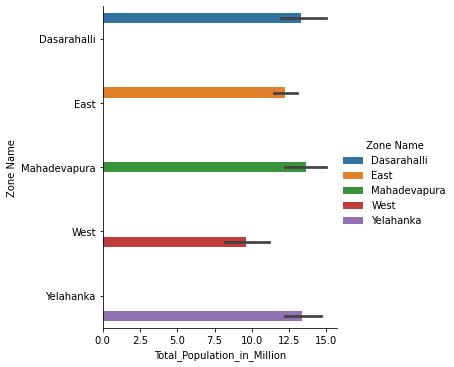

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_theme(style="ticks", color_codes=True)
sns.catplot(y="Zone Name", x="Total_Population_in_Million", hue="Zone Name", kind="bar", data=final_merged_df)

## We can see that Zones - 'Dasarahalli', 'Mahdevapura' & Yelahanka' are heavily populated.

--------------------------------

### Now lets see what are the top 5 wards with high population in each Zone

#### 1. Dasarahalli

(6, 7)
   City Name    Zone Name               Ward Name  Area (in sq km)  \
0  Bengaluru  Dasarahalli             Bagalakunte             11.9   
5  Bengaluru  Dasarahalli           T Dasarahalli             36.0   
3  Bengaluru  Dasarahalli  Peenya Industrial Area              8.4   
4  Bengaluru  Dasarahalli             Shettihalli             13.0   
1  Bengaluru  Dasarahalli            Chokkasandra              6.3   

   Total_Population_in_Million   Latitude  Longitude  
0                        16.92  13.059800  77.499883  
5                        13.72  13.045141  77.514789  
3                        13.53  13.019567  77.509589  
4                        12.91  13.066261  77.517986  
1                        11.70  13.038175  77.507538  


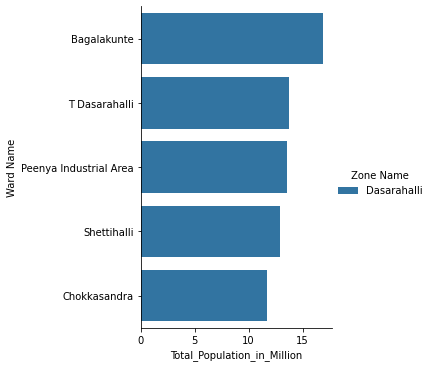

In [15]:
final_merged_df_dasarahalli = final_merged_df[final_merged_df['Zone Name'] == 'Dasarahalli']
sort_by_population = 'Total_Population_in_Million'
print(final_merged_df_dasarahalli.shape)
top_5_neighborhoods_dasarahalli = final_merged_df_dasarahalli.nlargest(5,sort_by_population)
print(top_5_neighborhoods_dasarahalli)
sns.catplot(y="Ward Name", x="Total_Population_in_Million", hue="Zone Name", kind="bar", data=top_5_neighborhoods_dasarahalli)

### Highly populated Neighborhood in 'Dasarahalli' is 'Bagalakunte'.

---------------------------------- 

#### 2. Mahadevapura

(8, 7)
    City Name     Zone Name       Ward Name  Area (in sq km)  \
36  Bengaluru  Mahadevapura        Horamavu             23.0   
33  Bengaluru  Mahadevapura  A Narayanapura              6.3   
35  Bengaluru  Mahadevapura      Devasandra              6.0   
37  Bengaluru  Mahadevapura            Hudi             20.1   
34  Bengaluru  Mahadevapura    Basavanapura             10.0   

    Total_Population_in_Million   Latitude  Longitude  
36                        17.37  13.027331  77.660151  
33                        14.96  12.993080  77.675359  
35                        14.25  13.001198  77.688193  
37                        13.75  13.065763  77.653033  
34                        13.51  13.017903  77.720615  


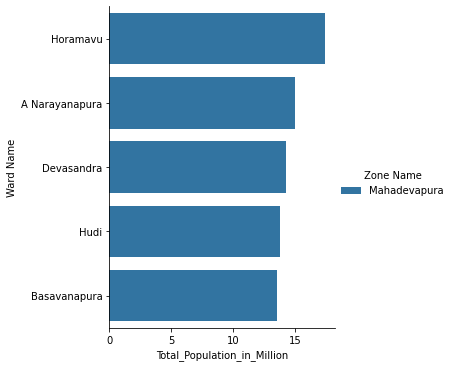

In [16]:
final_merged_df_mahadevapura = final_merged_df[final_merged_df['Zone Name'] == 'Mahadevapura']
sort_by_population = 'Total_Population_in_Million'
print(final_merged_df_mahadevapura.shape)
top_5_neighborhoods_mahadevapura = final_merged_df_mahadevapura.nlargest(5,sort_by_population)
print(top_5_neighborhoods_mahadevapura)
sns.catplot(y="Ward Name", x="Total_Population_in_Million", hue="Zone Name", kind="bar", data=top_5_neighborhoods_mahadevapura)

### Highly populated Neighborhood in Mahadevapura is 'Horamavu'.

#### 3. Yelahanka

(11, 7)
    City Name  Zone Name                 Ward Name  Area (in sq km)  \
64  Bengaluru  Yelahanka               Thanisandra             16.8   
56  Bengaluru  Yelahanka                    Atturu             11.4   
57  Bengaluru  Yelahanka           Byatarayanapura             11.4   
60  Bengaluru  Yelahanka                   Jakkuru             32.1   
66  Bengaluru  Yelahanka  Yelahanka Satellite Town              6.8   

    Total_Population_in_Million   Latitude  Longitude  
64                        17.30  13.054713  77.633926  
56                        15.56  13.107470  77.565685  
57                        15.48  13.062074  77.596392  
60                        14.36  13.078474  77.606894  
66                        13.31  13.089139  77.582717  


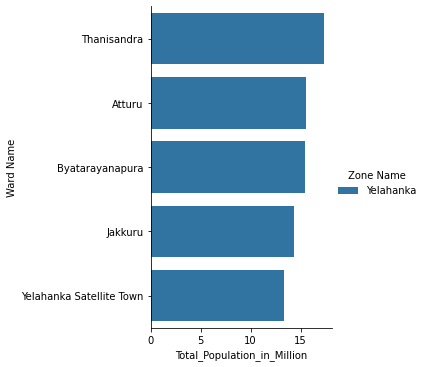

In [17]:
final_merged_df_Yelahanka = final_merged_df[final_merged_df['Zone Name'] == 'Yelahanka']
sort_by_population = 'Total_Population_in_Million'
print(final_merged_df_Yelahanka.shape)
top_5_neighborhoods_Yelahanka = final_merged_df_Yelahanka.nlargest(5,sort_by_population)
print(top_5_neighborhoods_Yelahanka)
sns.catplot(y="Ward Name", x="Total_Population_in_Million", hue="Zone Name", kind="bar", data=top_5_neighborhoods_Yelahanka)

### Highly populated Neighborhood in Yelahanka is 'Thanisandra'.

----------------------------------

####  Finally, lets us the top 5 most populated neighborhoods in all of bangalore

(55, 7)
    City Name     Zone Name         Ward Name  Area (in sq km)  \
36  Bengaluru  Mahadevapura          Horamavu             23.0   
64  Bengaluru     Yelahanka       Thanisandra             16.8   
0   Bengaluru   Dasarahalli       Bagalakunte             11.9   
8   Bengaluru          East  C.V. Raman Nagar             14.2   
56  Bengaluru     Yelahanka            Atturu             11.4   

    Total_Population_in_Million   Latitude  Longitude  
36                        17.37  13.027331  77.660151  
64                        17.30  13.054713  77.633926  
0                         16.92  13.059800  77.499883  
8                         16.71  12.985648  77.664977  
56                        15.56  13.107470  77.565685  


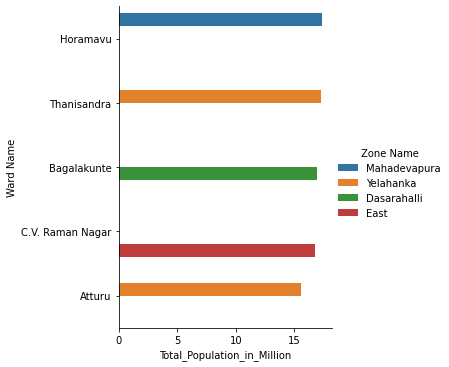

In [18]:
sort_by_population = 'Total_Population_in_Million'
print(final_merged_df.shape)
top_5_neighborhoods = final_merged_df.nlargest(5,sort_by_population)
print(top_5_neighborhoods)
sns.catplot(y="Ward Name", x="Total_Population_in_Million", hue="Zone Name", kind="bar", data=top_5_neighborhoods)

----------------------------------

### Let's see bangalore's locations using geopy library.

In [19]:
address = 'Bangalore, IN'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))

The geograpical coordinate of Bangalore, IN are 12.9791198, 77.5912997.


In [20]:
latitude = location.latitude
longitude = location.longitude
# create map of Bangalore using latitude and longitude values
map_city = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(final_merged_df['Latitude'], 
                                           final_merged_df['Longitude'],
                                           final_merged_df['Zone Name'], 
                                           final_merged_df['Ward Name']):
    label = '{}, {}'.format(borough, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_city)  
    
map_city

-----------------
<p style="color:red">  <b>  Page 03 </b> </p>
<p style="color:blue"> <b>  Objective: Plot the neighbours in Bangalore city after k-means clustering </b> </p>

<b> Examining the dataframe, we'll see 10 boroughs and their neighbourhoods. </b>

In [21]:
all_Zones = final_merged_df.groupby('Zone Name').size()
print("Total no of zones", all_Zones.shape)
all_Zones

Total no of zones (5,)


Zone Name
Dasarahalli      6
East            23
Mahadevapura     8
West             7
Yelahanka       11
dtype: int64

<p style="color:black"> <b> From foursquareAPI, get venues from the latitude & Longitude for all locations </b></p>

In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Ward Name', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
#set the variables
CLIENT_ID = 'RKWLC0DN3YQ4ACU1YP4SBYAEJ3VX5LDYYF4AC0JOA30IFVPQ'
CLIENT_SECRET = 'E1MLAWMWQHHJI0OOWALVR1KJ0ROESER5GF5BCJMV0D5YR0YQ'  
VERSION = '20180605'
radius = 500  
LIMIT = 100

nearby_venues = getNearbyVenues(names=final_merged_df['Ward Name'],
                                latitudes=final_merged_df['Latitude'],
                                longitudes=final_merged_df['Longitude'])


nearby_venues.head()

Bagalakunte
Chokkasandra
Mallasandra
Peenya Industrial Area
Shettihalli
T Dasarahalli
Banasavadi
Benniganahalli
C.V. Raman Nagar
Devara Jeevanahalli
Ganga Nagar
Gangenahalli
HBR Layout
Hebbala
Jayachamarajendra Nagar
Kacharkanahalli
Kadugondanahalli
Kammanahalli
Kaval Bairasandra
Kushal Nagar
Lingarajapura
Manorayana Palya
Maruthi Seva Nagar
Muneshwara Nagar
Nagavara
Ramaswamy Palya
SK Garden
SanJayanagar
Vishwanath Nagenahalli
A Narayanapura
Basavanapura
Devasandra
Horamavu
Hudi
KR Puram
Ramamurthy Nagar
Vijnanapura
Aramane Nagara
Kadu Malleshwar Ward
Malleshwaram
Mattikere
Nagapura
Nandini Layout
Subramanya Nagar
Atturu
Byatarayanapura
Chowdeswari Ward
Dodda Bommasandra
Jakkuru
Kempegowda Ward
Kodigehalli
Kuvempu Nagar
Thanisandra
Vidyaranyapura
Yelahanka Satellite Town


,Ward Name,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bagalakunte,13.059800,77.499883,Mussanje Chats,13.062515,77.499770,Snack Place
1,Peenya Industrial Area,13.019567,77.509589,Appaji Mane,13.022556,77.509753,Restaurant
2,Peenya Industrial Area,13.019567,77.509589,Axis Bank ATM,13.018150,77.506668,ATM
3,Peenya Industrial Area,13.019567,77.509589,Fabricspa,13.022460,77.512180,Dry Cleaner
4,T Dasarahalli,13.045141,77.514789,soundarya paradise,13.045984,77.515886,Indian Restaurant


In [24]:
print(nearby_venues.shape)
nearby_venues.head()

(324, 7)


,Ward Name,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bagalakunte,13.059800,77.499883,Mussanje Chats,13.062515,77.499770,Snack Place
1,Peenya Industrial Area,13.019567,77.509589,Appaji Mane,13.022556,77.509753,Restaurant
2,Peenya Industrial Area,13.019567,77.509589,Axis Bank ATM,13.018150,77.506668,ATM
3,Peenya Industrial Area,13.019567,77.509589,Fabricspa,13.022460,77.512180,Dry Cleaner
4,T Dasarahalli,13.045141,77.514789,soundarya paradise,13.045984,77.515886,Indian Restaurant


<b> Get the count of Venue in each Neighbourhood </b>

In [25]:
nearby_venues.groupby('Ward Name').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Ward Name,,,,,,
A Narayanapura,4,4,4,4,4,4
Aramane Nagara,20,20,20,20,20,20
Bagalakunte,1,1,1,1,1,1
Banasavadi,10,10,10,10,10,10
Basavanapura,1,1,1,1,1,1
Benniganahalli,33,33,33,33,33,33
Byatarayanapura,12,12,12,12,12,12
C.V. Raman Nagar,9,9,9,9,9,9
Chowdeswari Ward,1,1,1,1,1,1


<b> Get the count of Unique Venues Category </b>

In [51]:
print('There are {} uniques categories.'.format(len(nearby_venues['Venue Category'].unique())))
unique_nearby_venues = nearby_venues['Venue Category'].unique()

There are 93 uniques categories.


array(['Snack Place', 'Restaurant', 'ATM', 'Dry Cleaner',
       'Indian Restaurant', 'Metro Station', 'Electronics Store',
       'Karnataka Restaurant', 'Resort', 'Indian Sweet Shop',
       'Pizza Place', 'BBQ Joint', 'Vegetarian / Vegan Restaurant',
       'Café', 'Kerala Restaurant', 'Bakery', 'Dessert Shop',
       'Steakhouse', 'Convenience Store', 'Gym', 'Coffee Shop',
       'Donut Shop', 'Italian Restaurant', 'Sandwich Place',
       'Mexican Restaurant', 'Fast Food Restaurant', 'Department Store',
       'Clothing Store', 'Multicuisine Indian Restaurant', 'Bus Station',
       'Shopping Mall', 'New American Restaurant', 'Mughlai Restaurant',
       'Lake', 'Pharmacy', 'Park', 'Shop & Service', 'Road',
       'North Indian Restaurant', 'Movie Theater', 'Hotel',
       'Korean Restaurant', 'Chinese Restaurant', 'Burger Joint',
       'South Indian Restaurant', 'Bar', 'Lounge', 'Multiplex',
       'Food Truck', 'Diner', 'Andhra Restaurant', 'Business Service',
       'Juice Bar

### Analyze Each Neighborhood

<b> Normalizing/ Feature Engineering - One hot encoding by Venues Category </b>

In [27]:
# one hot encoding
Bangalore_onehot = pd.get_dummies(nearby_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Bangalore_onehot['Ward Name'] = nearby_venues['Ward Name'] 

# move neighborhood column to the first column
fixed_columns = [Bangalore_onehot.columns[-1]] + list(Bangalore_onehot.columns[:-1])
Bangalore_onehot = Bangalore_onehot[fixed_columns]

Bangalore_onehot.head()

,Ward Name,ATM,American Restaurant,Andhra Restaurant,Asian Restaurant,Athletics & Sports,BBQ Joint,Badminton Court,Bakery,Bar,Basketball Court,Bookstore,Bowling Alley,Breakfast Spot,Burger Joint,Bus Station,Business Service,Café,Camera Store,Chinese Restaurant,Clothing Store,Coffee Shop,Convenience Store,Cosmetics Shop,Department Store,Dessert Shop,Diner,Donut Shop,Dry Cleaner,Electronics Store,Fast Food Restaurant,Flea Market,Flower Shop,Food Court,Food Truck,French Restaurant,Fruit & Vegetable Store,Gourmet Shop,Gym,Gym / Fitness Center,Historic Site,Hotel,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Italian Restaurant,Juice Bar,Karnataka Restaurant,Kerala Restaurant,Kids Store,Korean Restaurant,Lake,Light Rail Station,Liquor Store,Lounge,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Motorcycle Shop,Movie Theater,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,New American Restaurant,Nightclub,North Indian Restaurant,Other Nightlife,Outdoors & Recreation,Park,Pharmacy,Pizza Place,Plaza,Pub,Rajasthani Restaurant,Residential Building (Apartment / Condo),Resort,Restaurant,Road,Sandwich Place,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,South Indian Restaurant,Spa,Steakhouse,Supermarket,Thai Restaurant,Vegetarian / Vegan Restaurant,Wine Shop,Women's Store
0,Bagalakunte,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,Peenya Industrial Area,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Peenya Industrial Area,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Peenya Industrial Area,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,T Dasarahalli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
Bangalore_onehot.shape

(324, 94)

#### group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [29]:
Bangalore_grouped = Bangalore_onehot.groupby('Ward Name').mean().reset_index()
Bangalore_grouped

,Ward Name,ATM,American Restaurant,Andhra Restaurant,Asian Restaurant,Athletics & Sports,BBQ Joint,Badminton Court,Bakery,Bar,Basketball Court,Bookstore,Bowling Alley,Breakfast Spot,Burger Joint,Bus Station,Business Service,Café,Camera Store,Chinese Restaurant,Clothing Store,Coffee Shop,Convenience Store,Cosmetics Shop,Department Store,Dessert Shop,Diner,Donut Shop,Dry Cleaner,Electronics Store,Fast Food Restaurant,Flea Market,Flower Shop,Food Court,Food Truck,French Restaurant,Fruit & Vegetable Store,Gourmet Shop,Gym,Gym / Fitness Center,Historic Site,Hotel,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Italian Restaurant,Juice Bar,Karnataka Restaurant,Kerala Restaurant,Kids Store,Korean Restaurant,Lake,Light Rail Station,Liquor Store,Lounge,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Motorcycle Shop,Movie Theater,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,New American Restaurant,Nightclub,North Indian Restaurant,Other Nightlife,Outdoors & Recreation,Park,Pharmacy,Pizza Place,Plaza,Pub,Rajasthani Restaurant,Residential Building (Apartment / Condo),Resort,Restaurant,Road,Sandwich Place,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,South Indian Restaurant,Spa,Steakhouse,Supermarket,Thai Restaurant,Vegetarian / Vegan Restaurant,Wine Shop,Women's Store
0,A Narayanapura,0.250000,0.0,0.000000,0.000,0.00,0.0,0.000000,0.000000,0.0,0.000000,0.000,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000,0.0,0.000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.250000,0.000,0.000000,0.00,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000,0.000,0.000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000,0.000,0.000000,0.000000,0.000000
1,Aramane Nagara,0.000000,0.0,0.000000,0.000,0.00,0.0,0.000000,0.000000,0.0,0.000000,0.000,0.000,0.0,0.000000,0.000000,0.000000,0.050000,0.000000,0.050000,0.000000,0.150000,0.000000,0.000000,0.100000,0.050000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000,0.0,0.000,0.00,0.050000,0.050000,0.000000,0.0,0.000000,0.100000,0.100000,0.000,0.000000,0.00,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.05,0.000000,0.000000,0.0,0.050000,0.000000,0.000000,0.05,0.000000,0.000,0.000,0.000,0.000000,0.00,0.000000,0.050000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000,0.000,0.000000,0.000000,0.050000
2,Bagalakunte,0.000000,0.0,0.000000,0.000,0.00,0.0,0.000000,0.000000,0.0,0.000000,0.000,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000,0.000,0.000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.0,1.000000,0.000000,0.00,0.000000,0.000,0.000,0.000000,0.000000,0.000000
3,Banasavadi,0.000000,0.0,0.000000,0.000,0.00,0.1,0.000000,0.200000,0.0,0.000000,0.000,0.000,0.0,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.300000,0.000,0.000000,0.00,0.000,0.100000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000

### print each neighborhood along with the top 5 most common venues


In [30]:
num_top_venues = 5

for hood in Bangalore_grouped['Ward Name']:
    print("----"+hood+"----")
    temp = Bangalore_grouped[Bangalore_grouped['Ward Name'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----A Narayanapura----
                   venue  freq
0      Electronics Store  0.50
1                    ATM  0.25
2      Indian Restaurant  0.25
3          Movie Theater  0.00
4  Outdoors & Recreation  0.00


----Aramane Nagara----
               venue  freq
0        Coffee Shop  0.15
1   Department Store  0.10
2  Indian Restaurant  0.10
3     Ice Cream Shop  0.10
4      Women's Store  0.05


----Bagalakunte----
                   venue  freq
0            Snack Place   1.0
1                    ATM   0.0
2        Motorcycle Shop   0.0
3  Outdoors & Recreation   0.0
4        Other Nightlife   0.0


----Banasavadi----
               venue  freq
0  Indian Restaurant   0.3
1             Bakery   0.2
2       Dessert Shop   0.1
3               Café   0.1
4  Kerala Restaurant   0.1


----Basavanapura----
                   venue  freq
0             Kids Store   1.0
1          Movie Theater   0.0
2                   Park   0.0
3  Outdoors & Recreation   0.0
4        Other Nightlife   0.0


--

<b> Sort the venues in descending order. </b>

In [31]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

<b> Create a new dataframe and display the top 10 venues for each neighborhood. </b>

In [148]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Ward Name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Ward Name'] = Bangalore_grouped['Ward Name']

for ind in np.arange(Bangalore_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Bangalore_grouped.iloc[ind, :], num_top_venues)


print(neighborhoods_venues_sorted.shape)
neighborhoods_venues_sorted.head()

(43, 11)


,Ward Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,A Narayanapura,Electronics Store,ATM,Indian Restaurant,Food Truck,Dessert Shop,Diner,Donut Shop,Dry Cleaner,Fast Food Restaurant,Flea Market
1,Aramane Nagara,Coffee Shop,Indian Restaurant,Ice Cream Shop,Department Store,Seafood Restaurant,Gym,Gourmet Shop,Fast Food Restaurant,Dessert Shop,Nightclub
2,Bagalakunte,Snack Place,Women's Store,Food Truck,Dessert Shop,Diner,Donut Shop,Dry Cleaner,Electronics Store,Fast Food Restaurant,Flea Market
3,Banasavadi,Indian Restaurant,Bakery,Vegetarian / Vegan Restaurant,Kerala Restaurant,BBQ Joint,Dessert Shop,Café,Women's Store,Food Court,Donut Shop
4,Basavanapura,Kids Store,Women's Store,French Restaurant,Diner,Donut Shop,Dry Cleaner,Electronics Store,Fast Food Restaurant,Flea Market,Flower Shop


# Run k-means to cluster the neighborhood into 7 clusters.

In [149]:
# set number of clusters
kclusters = 6

Bangalore_grouped_clustering = Bangalore_grouped.drop('Ward Name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Bangalore_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 



array([1, 1, 2, 3, 5, 1, 3, 3, 3, 3])

<b> Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood. </b>

In [150]:
# add clustering labels #apple#
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Bangalore_merged = final_merged_df

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
Bangalore_merged = Bangalore_merged.join(neighborhoods_venues_sorted.set_index('Ward Name'), on='Ward Name')
Bangalore_merged = Bangalore_merged.dropna()
Bangalore_merged 

,City Name,Zone Name,Ward Name,Area (in sq km),Total_Population_in_Million,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bengaluru,Dasarahalli,Bagalakunte,11.9,16.92,13.059800,77.499883,2.0,Snack Place,Women's Store,Food Truck,Dessert Shop,Diner,Donut Shop,Dry Cleaner,Electronics Store,Fast Food Restaurant,Flea Market
3,Bengaluru,Dasarahalli,Peenya Industrial Area,8.4,13.53,13.019567,77.509589,0.0,ATM,Dry Cleaner,Restaurant,Cosmetics Shop,Dessert Shop,Diner,Donut Shop,Electronics Store,Fast Food Restaurant,Flea Market
5,Bengaluru,Dasarahalli,T Dasarahalli,36.0,13.72,13.045141,77.514789,1.0,Karnataka Restaurant,Resort,Electronics Store,Indian Restaurant,Indian Sweet Shop,Metro Station,Pizza Place,ATM,Snack Place,Flea Market
6,Bengaluru,East,Banasavadi,6.6,12.93,13.015546,77.650715,3.0,Indian Restaurant,Bakery,Vegetarian / Vegan Restaurant,Kerala Restaurant,BBQ Joint,Dessert Shop,Café,Women's Store,Food Court,Donut Shop
7,Bengaluru,East,Benniganahalli,17.5,14.84,12.994919,77.662603,1.0,Clothing Store,Indian Restaurant,Fast Food Restaurant,Department Store,Coffee Shop,Snack Place,Pharmacy,Convenience Store,New American Restaurant,Multicuisine Indian Restaurant
8,Bengaluru,East,C.V. Raman Nagar,14.2,16.71,12.985648,77.664977,3.0,Indian Restaurant,Pizza Place,Park,Shop & Service,Café,Department Store,Gym / Fitness Center,Fast Food Restaurant,Dessert Shop,Ice Cream Shop
10,Bengaluru,East,Ganga Nagar,10.3,9.99,13.023247,77.588357,3.0,Indian Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Pizza Place,Bakery,Women's Store,Food Court,Dessert Shop,Diner,Donut Shop
12,Bengaluru,East,HBR Layout,7.5,13.76,13.035870,77.632360,1.0,North Indian Restaurant,Coffee Shop,Café,Road,Women's Store,Flower Shop,Diner,Donut Shop,Dry Cleaner,Electronics Store
13,Bengaluru,East,Hebbala,4.1,10.78,13.038325,77.589063,1.0,Pharmacy,Indian Restaurant,Bakery,Café,Food Truck,Diner,Donut Shop,Dry Cleaner,Electronics Store,Fast Food Restaurant
15,Bengaluru,East,Jayachamarajendra Nagar,3.7,11.17,13.015621,77.595221,3.0,Indian Restaurant,Vegetarian / Vegan Restaurant,Hotel,Pizza Place,Movie Theater,Women's Store,Flower Shop,Dessert Shop,Diner,Donut Shop


<b> View the clusters in map </b>

In [151]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Bangalore_merged['Latitude'], Bangalore_merged['Longitude'], Bangalore_merged['Ward Name'], Bangalore_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 5. Examine Clusters

<b> Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. </b>

In [152]:
Bangalore_merged.loc[Bangalore_merged['Cluster Labels'] == 0, Bangalore_merged.columns[[2] + list(range(5, Bangalore_merged.shape[1]))]]

,Ward Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Peenya Industrial Area,13.019567,77.509589,0.0,ATM,Dry Cleaner,Restaurant,Cosmetics Shop,Dessert Shop,Diner,Donut Shop,Electronics Store,Fast Food Restaurant,Flea Market
24,Muneshwara Nagar,13.014081,77.611474,0.0,ATM,Food Truck,Dessert Shop,Diner,Donut Shop,Dry Cleaner,Electronics Store,Fast Food Restaurant,Flea Market,Flower Shop
40,Vijnanapura,13.005338,77.669363,0.0,ATM,Food Truck,Dessert Shop,Diner,Donut Shop,Dry Cleaner,Electronics Store,Fast Food Restaurant,Flea Market,Flower Shop
60,Jakkuru,13.078474,77.606894,0.0,ATM,Food Truck,Dessert Shop,Diner,Donut Shop,Dry Cleaner,Electronics Store,Fast Food Restaurant,Flea Market,Flower Shop


In [153]:
Bangalore_merged.loc[Bangalore_merged['Cluster Labels'] == 1, Bangalore_merged.columns[[2] + list(range(5, Bangalore_merged.shape[1]))]]

,Ward Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,T Dasarahalli,13.045141,77.514789,1.0,Karnataka Restaurant,Resort,Electronics Store,Indian Restaurant,Indian Sweet Shop,Metro Station,Pizza Place,ATM,Snack Place,Flea Market
7,Benniganahalli,12.994919,77.662603,1.0,Clothing Store,Indian Restaurant,Fast Food Restaurant,Department Store,Coffee Shop,Snack Place,Pharmacy,Convenience Store,New American Restaurant,Multicuisine Indian Restaurant
12,HBR Layout,13.035870,77.632360,1.0,North Indian Restaurant,Coffee Shop,Café,Road,Women's Store,Flower Shop,Diner,Donut Shop,Dry Cleaner,Electronics Store
13,Hebbala,13.038325,77.589063,1.0,Pharmacy,Indian Restaurant,Bakery,Café,Food Truck,Diner,Donut Shop,Dry Cleaner,Electronics Store,Fast Food Restaurant
16,Kacharkanahalli,13.019958,77.633948,1.0,Indian Restaurant,South Indian Restaurant,Fast Food Restaurant,Burger Joint,Korean Restaurant,Coffee Shop,Snack Place,Electronics Store,Chinese Restaurant,Café
18,Kammanahalli,13.009346,77.637709,1.0,Lake,Bar,Women's Store,French Restaurant,Diner,Donut Shop,Dry Cleaner,Electronics Store,Fast Food Restaurant,Flea Market
19,Kaval Bairasandra,13.028397,77.611513,1.0,Department Store,Fast Food Restaurant,Bakery,Women's Store,Food Truck,Diner,Donut Shop,Dry Cleaner,Electronics Store,Flea Market
23,Maruthi Seva Nagar,13.000561,77.630008,1.0,Fast Food Restaurant,Clothing Store,Department Store,Multiplex,Coffee Shop,Lounge,Shopping Mall,Café,Bus Station,Women's Store
25,Nagavara,13.037465,77.623602,1.0,Vegetarian / Vegan Restaurant,Indian Restaurant,Andhra Restaurant,Diner,Pizza Place,Bus Station,Women's Store,Food Court,Donut Shop,Dry Cleaner
28,Ramaswamy Palya,13.006307,77.599353,1.0,Electronics Store,Café,Business Service,Women's Store,Department Store,Diner,Donut Shop,Dry Cleaner,Fast Food Restaurant,Flea Market


In [154]:
Bangalore_merged.loc[Bangalore_merged['Cluster Labels'] == 2, Bangalore_merged.columns[[2] + list(range(5, Bangalore_merged.shape[1]))]]

,Ward Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bagalakunte,13.0598,77.499883,2.0,Snack Place,Women's Store,Food Truck,Dessert Shop,Diner,Donut Shop,Dry Cleaner,Electronics Store,Fast Food Restaurant,Flea Market


In [155]:
Bangalore_merged.loc[Bangalore_merged['Cluster Labels'] == 3, Bangalore_merged.columns[[2] + list(range(5, Bangalore_merged.shape[1]))]]

,Ward Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Banasavadi,13.015546,77.650715,3.0,Indian Restaurant,Bakery,Vegetarian / Vegan Restaurant,Kerala Restaurant,BBQ Joint,Dessert Shop,Café,Women's Store,Food Court,Donut Shop
8,C.V. Raman Nagar,12.985648,77.664977,3.0,Indian Restaurant,Pizza Place,Park,Shop & Service,Café,Department Store,Gym / Fitness Center,Fast Food Restaurant,Dessert Shop,Ice Cream Shop
10,Ganga Nagar,13.023247,77.588357,3.0,Indian Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Pizza Place,Bakery,Women's Store,Food Court,Dessert Shop,Diner,Donut Shop
15,Jayachamarajendra Nagar,13.015621,77.595221,3.0,Indian Restaurant,Vegetarian / Vegan Restaurant,Hotel,Pizza Place,Movie Theater,Women's Store,Flower Shop,Dessert Shop,Diner,Donut Shop
35,Devasandra,13.001198,77.688193,3.0,Indian Restaurant,Motorcycle Shop,Women's Store,Food Truck,Diner,Donut Shop,Dry Cleaner,Electronics Store,Fast Food Restaurant,Flea Market
38,KR Puram,13.007516,77.695935,3.0,Indian Restaurant,Bus Station,Clothing Store,Women's Store,Food Court,Diner,Donut Shop,Dry Cleaner,Electronics Store,Fast Food Restaurant
57,Byatarayanapura,13.062074,77.596392,3.0,Indian Restaurant,Cosmetics Shop,Department Store,Kerala Restaurant,Gourmet Shop,Flower Shop,Wine Shop,Andhra Restaurant,Badminton Court,Fruit & Vegetable Store
58,Chowdeswari Ward,13.120459,77.579618,3.0,Indian Restaurant,Women's Store,Food Truck,Dessert Shop,Diner,Donut Shop,Dry Cleaner,Electronics Store,Fast Food Restaurant,Flea Market


## Results and Discussion <a name="results"></a>

Our Analysis shows that there are many Restuarants & eateries, grouped in clusters, are mostly clustered to the west and Central Bengaluru. Also, utility works such as Dry cleaners and Electronic stores are distributed at too much distance.

## Conclusion <a name="conclusion"></a>

In [ ]:
The Purpose of this project was to identify the ideal locationsfor business inverstor to start a business.
So, using the Foursquare API was used to get the density of stores/venues that are already available in the Neighborhood.
Then clustering of vensues in each neighborhood was performed.

By looking at the clusters of venues by density, the stakeholders can deduced the type of business they would like to start
in a neighborhood.